<a href="https://colab.research.google.com/github/monisakhtar/ML/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [113]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Display all columns
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

In [114]:
# importing train and test data
test = pd.read_csv('/content/drive/MyDrive/Datasets/Advance House Price Prediction/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Datasets/Advance House Price Prediction/train.csv')
# Shape of dataset with rows and columns
train.shape

(1460, 81)

In [115]:
# Print top 5 records
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**In Data Analysis We will Analyze To Find out the below stuff**

1.   Missing Values
2.   All The Numerical Variables
3.   Distribution of the Numerical Variables
4.   Categorical Variables
5.   Cardinality of Categorical Variables
6.   Outliers
7.   Relationship between independent and dependent feature(SalePrice)







In [116]:
# let us check percentage of missing values in each column
missing = train.isna().mean().round(4)*100
missing
#missing.dtype

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [117]:
# Finding features with missing values
NaN_features = []
for feature in train.columns:
  if train[feature].isna().sum() > 0:
    NaN_features.append(feature)

# Percentage of missing value in missing column
for feature in NaN_features:
  print(feature, np.round((train[feature].isna().mean())*100, 4))

print('There are',len(NaN_features), 'columns with missing values')

LotFrontage 17.7397
Alley 93.7671
MasVnrType 0.5479
MasVnrArea 0.5479
BsmtQual 2.5342
BsmtCond 2.5342
BsmtExposure 2.6027
BsmtFinType1 2.5342
BsmtFinType2 2.6027
Electrical 0.0685
FireplaceQu 47.2603
GarageType 5.5479
GarageYrBlt 5.5479
GarageFinish 5.5479
GarageQual 5.5479
GarageCond 5.5479
PoolQC 99.5205
Fence 80.7534
MiscFeature 96.3014
There are 19 columns with missing values


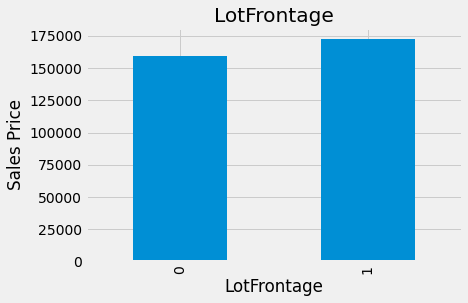

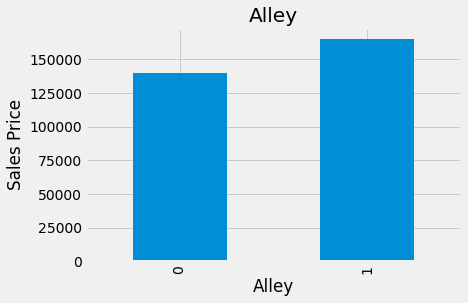

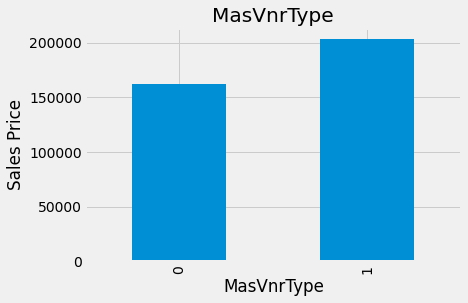

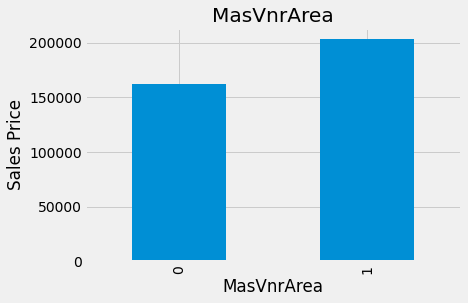

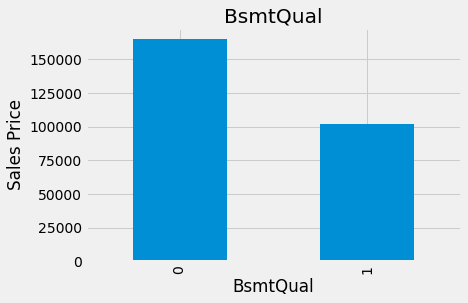

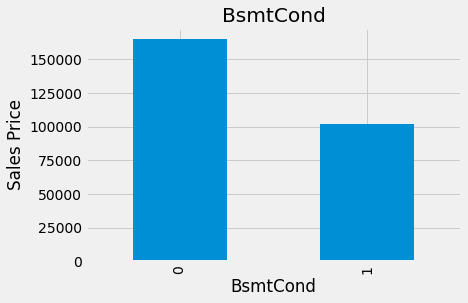

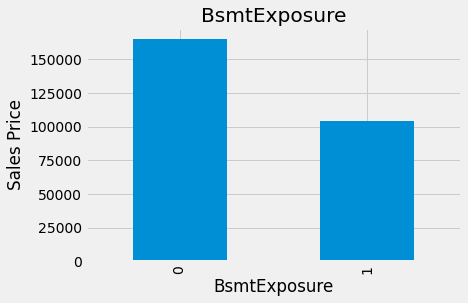

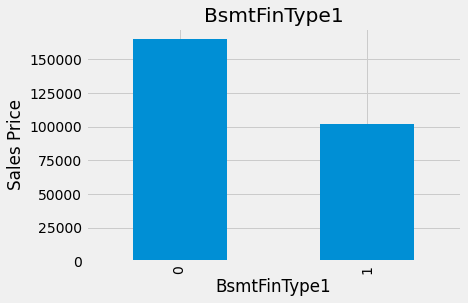

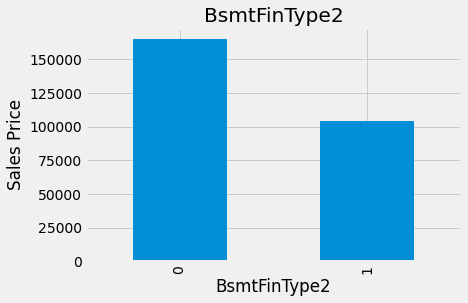

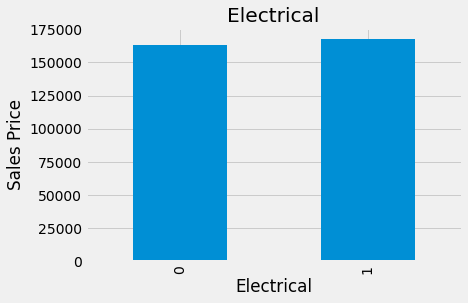

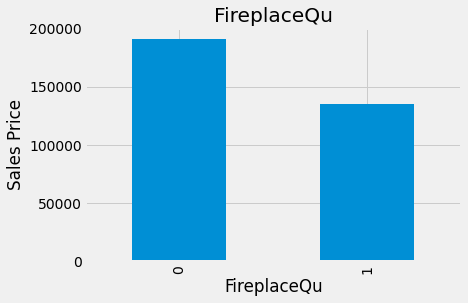

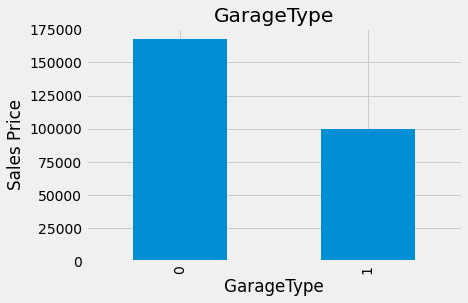

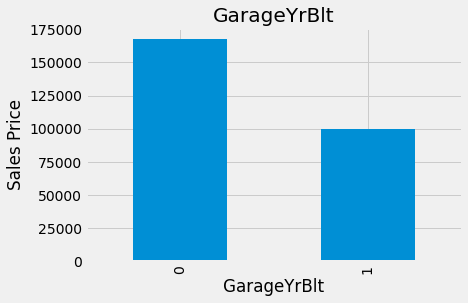

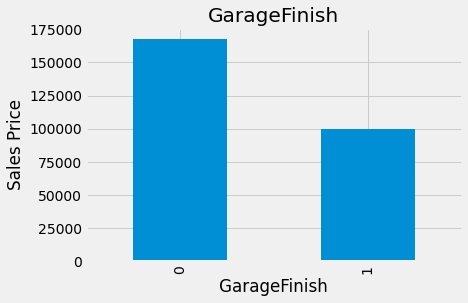

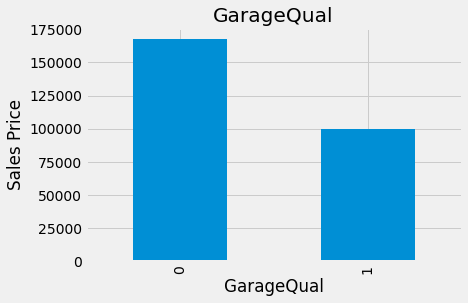

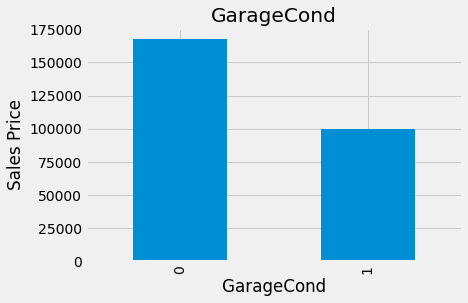

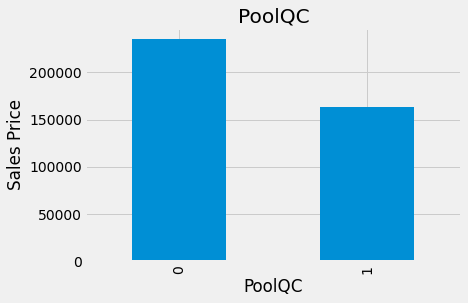

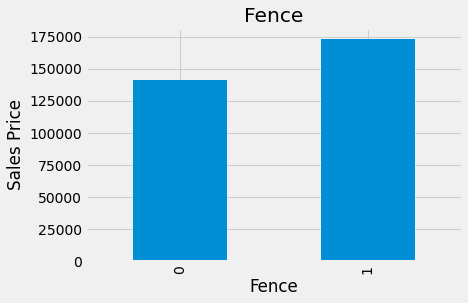

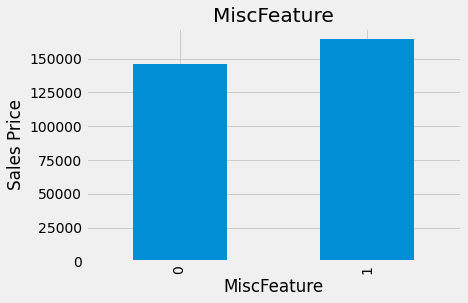

In [118]:
for feature in NaN_features:
  train_copy = train.copy()

  # Converting NaN values to 1 and non NaN value to 1
  train_copy[feature] = np.where(train_copy[feature].isna(), 1, 0)

  # let's calculate the mean SalePrice where the information is missing or present
  train_copy.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('Sales Price')
  plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [119]:
# Features like Id are not required
train['Id'].shape

(1460,)

# Numerical Variables

In [120]:
# list of numerical varialble
Numericial_Features = []
for feature in train.columns:
  if train[feature].dtype != 'object':
    Numericial_Features.append(feature)

print('Number of numerical variables :', len(Numericial_Features))

Number of numerical variables : 38


In [121]:
# Short hand method for above code
Numericial_Features = [feature for feature in train.columns if train[feature].dtype != 'object']
print('Number of numerical variables :', len(Numericial_Features))

Number of numerical variables : 38


In [122]:
# Visualizing the numerical variable
train[Numericial_Features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [123]:
# list of variables that contain year information
Year_Feature = [feature for feature in train.columns if 'Yr' in feature or "Year" in feature or 'Mo' in feature]

Year_Feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

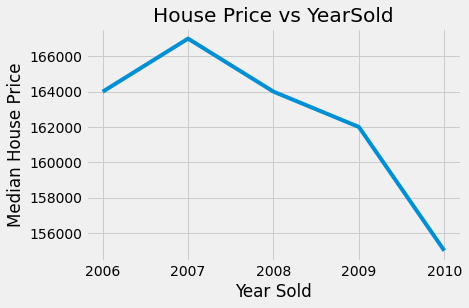

In [124]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Text(0.5, 1.0, 'House Price vs YearSold')

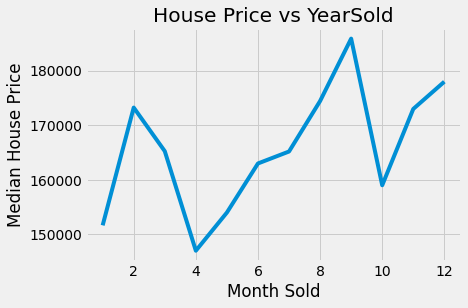

In [133]:
## We will check whether there is a relation between month the house is sold and the sales price

train.groupby('MoSold')['SalePrice'].median().plot()
plt.xlabel('Month Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

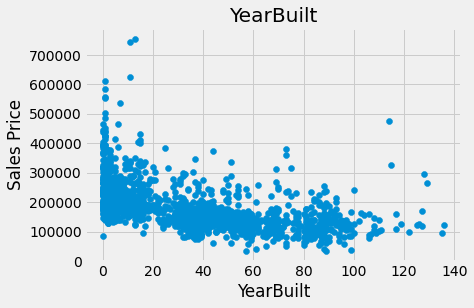

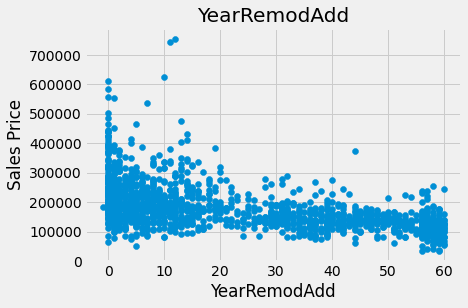

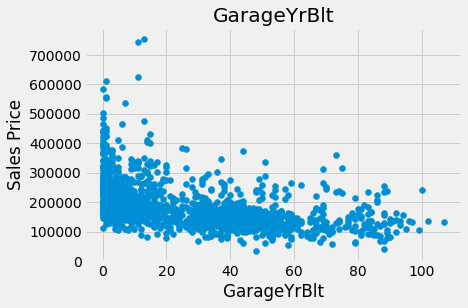

In [136]:
# Here we will compare difference between All years and Year sold

for feature in Year_Feature:
  if feature != 'YrSold':
    if feature != 'MoSold':
      train_copy = train.copy()
      train_copy[feature] = train_copy['YrSold'] - train_copy[feature]
      plt.scatter(train_copy[feature], train_copy['SalePrice'])
      plt.ylabel('Sales Price')
      plt.xlabel(feature)
      plt.title(feature)
      plt.show()

In [126]:
for feature in Numericial_Features:
  print(feature, train[feature].unique().sum())

Id 1066530
MSSubClass 1295
LotFrontage nan
LotArea 12156992
OverallQual 55
OverallCond 45
YearBuilt 218630
YearRemodAdd 120780
MasVnrArea nan
BsmtFinSF1 446807
BsmtFinSF2 60994
BsmtUnfSF 542781
TotalBsmtSF 855839
1stFlrSF 943095
2ndFlrSF 346372
LowQualFinSF 8013
GrLivArea 1395675
BsmtFullBath 6
BsmtHalfBath 3
FullBath 6
HalfBath 3
BedroomAbvGr 29
KitchenAbvGr 6
TotRmsAbvGrd 91
Fireplaces 6
GarageYrBlt nan
GarageCars 10
GarageArea 252637
WoodDeckSF 65988
OpenPorchSF 27762
EnclosedPorch 19149
3SsnPorch 4102
ScreenPorch 14943
PoolArea 4028
MiscVal 42364
MoSold 78
YrSold 10040
SalePrice 133717646


In [127]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
### Let us consider if a feature has less than 25 values we will call it discrete

Discrete_Feature = [feature for feature in Numericial_Features if len(train[feature].unique()) < 25 and feature not in Year_Feature+['Id']]

print(f'There are {len(Discrete_Feature)} discrete feature')
Discrete_Feature

There are 16 discrete feature


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [128]:
# Visualizing Discrete values
train[Discrete_Feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0


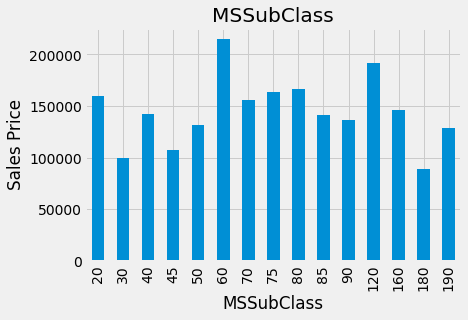

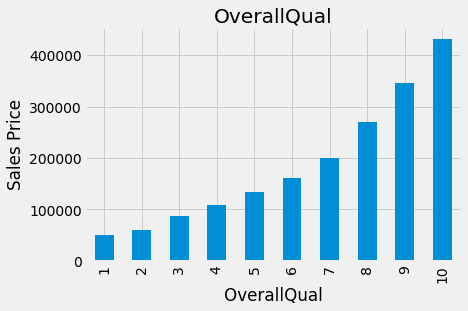

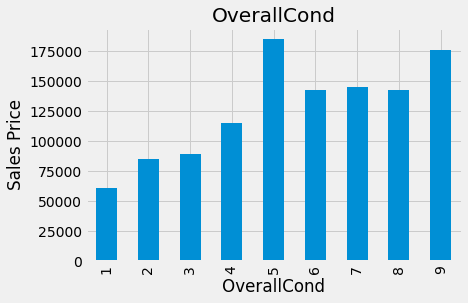

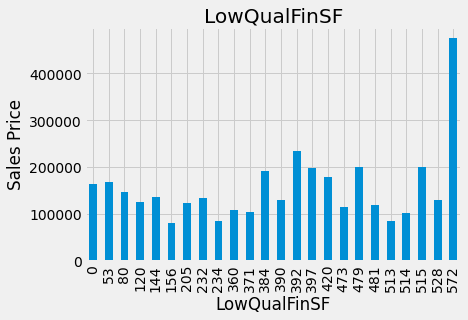

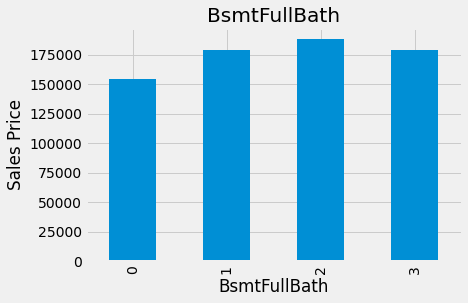

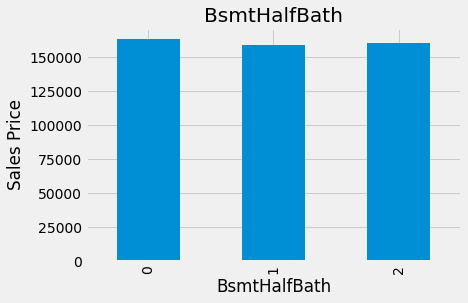

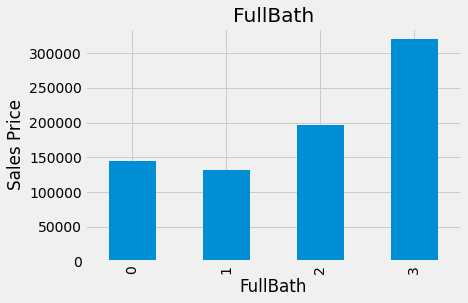

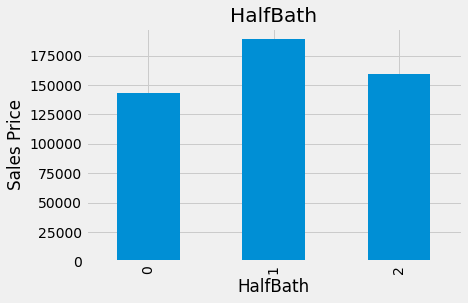

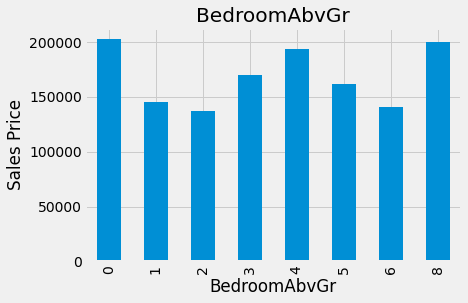

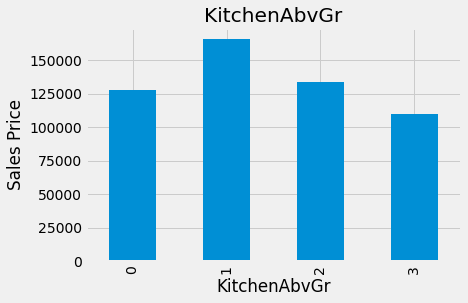

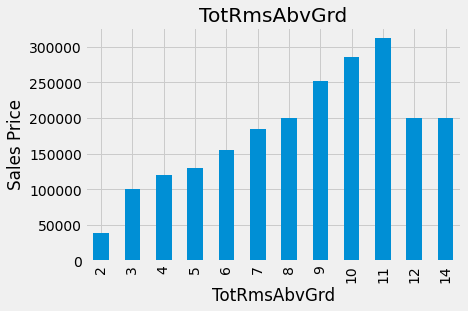

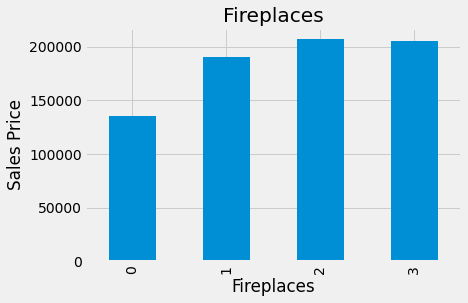

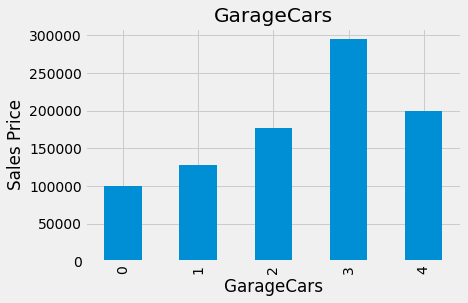

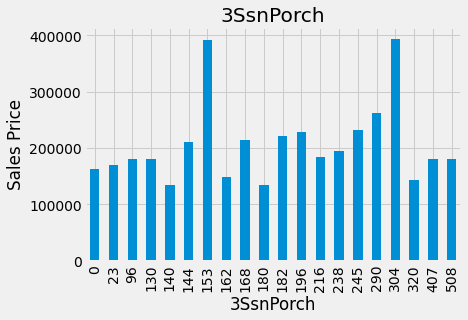

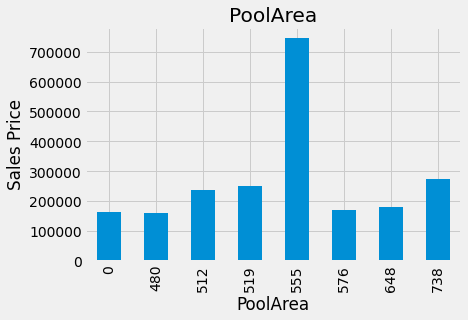

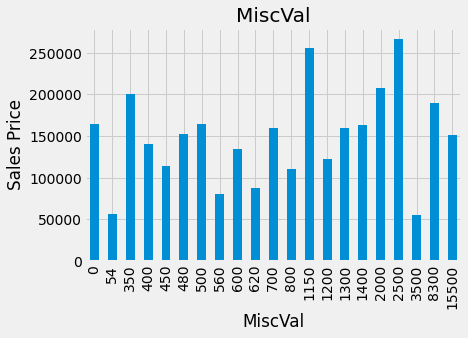

In [129]:

## Lets Find the realtionship between them and Sale PRice

for feature in Discrete_Feature:
  train_copy = train.copy()

  # let's calculate the mean SalePrice where the information is missing or present
  train_copy.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('Sales Price')
  plt.show()

In [130]:
## 2. Continous variable 

Continuos_Feature = [feature for feature in Numericial_Features if feature not in Discrete_Feature+Year_Feature+['Id']]

print(f'There are {len(Continuos_Feature)} discrete feature')
Continuos_Feature

There are 16 discrete feature


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [131]:
# Visualizing Continuous Features
train[Continuos_Feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


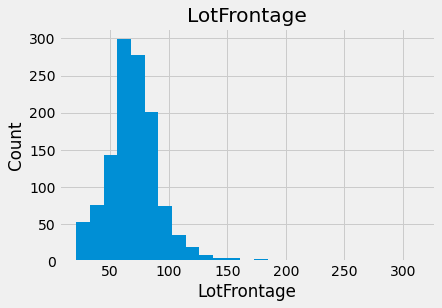

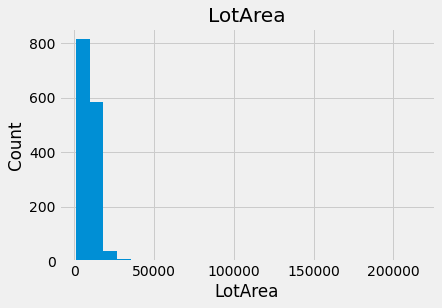

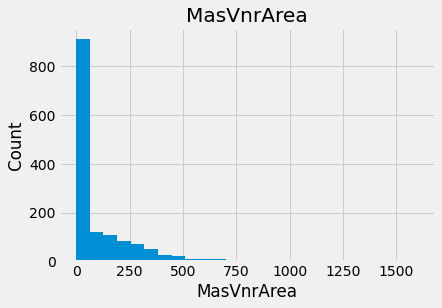

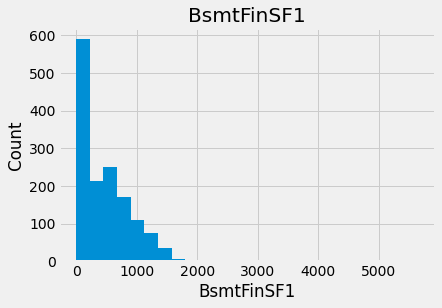

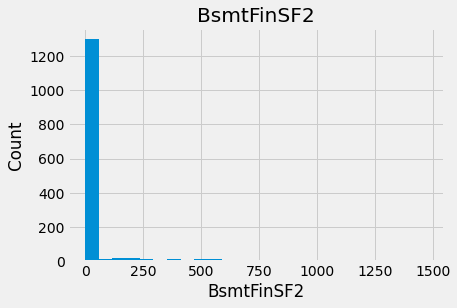

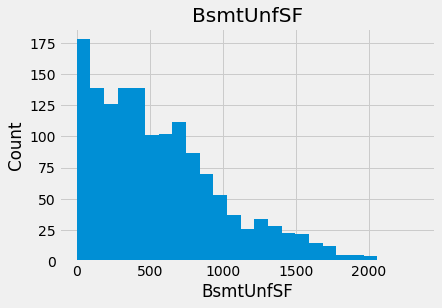

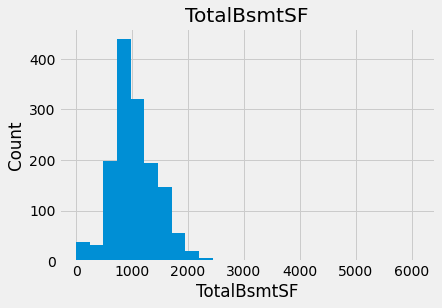

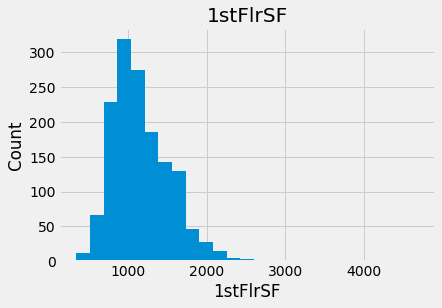

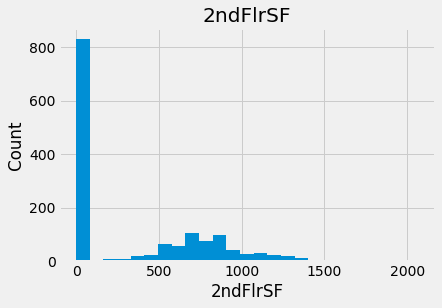

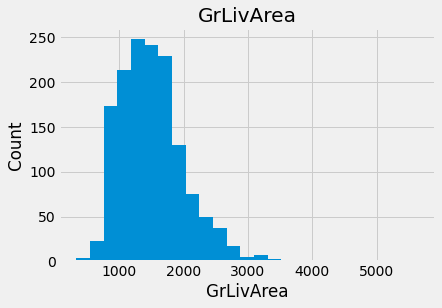

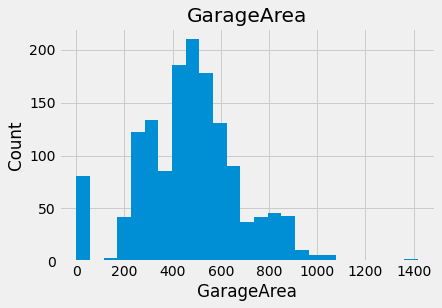

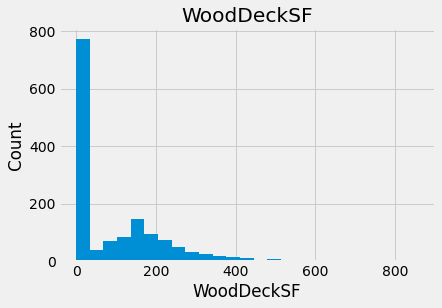

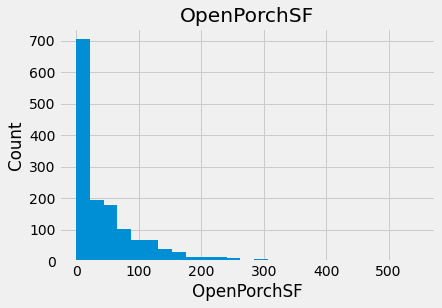

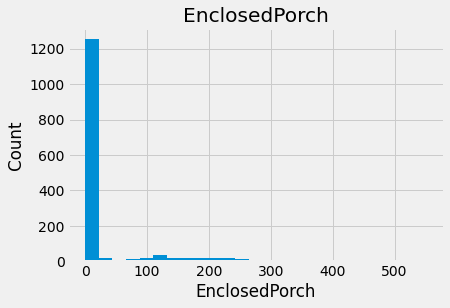

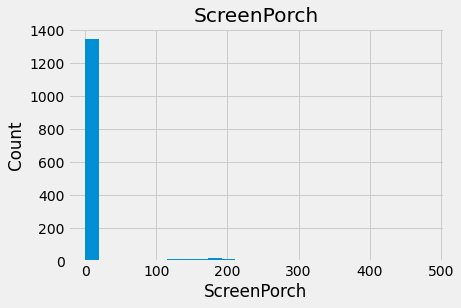

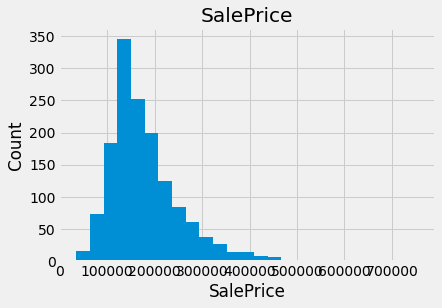

In [132]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in Continuos_Feature:
    train_copy=train.copy()
    train_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
